In [21]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Conv1D,MaxPool1D,Flatten,Dense,LSTM
from tensorflow.keras.models import Sequential
(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words=5000)

In [25]:
from tensorflow.keras.preprocessing import sequence
MAX_LEN = 1000
X_train = sequence.pad_sequences(X_train,MAX_LEN)
X_test = sequence.pad_sequences(X_test,MAX_LEN)

In [15]:
# Creación de la red convolucional
model = Sequential()
model.add(Embedding(input_dim = 5000, output_dim = 100))
model.add(Conv1D(filters=32,kernel_size=3,activation="relu"))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(rate=0.2))
model.add(Flatten())
model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
%%time
model_hist = model.fit(x=X_train,y=y_train,batch_size=1024,epochs=15)

Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 253ms/step - accuracy: 0.5190 - loss: 0.6928
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - accuracy: 0.7004 - loss: 0.6330
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - accuracy: 0.8180 - loss: 0.4853
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 0.8317 - loss: 0.3818
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.8960 - loss: 0.2627
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.9105 - loss: 0.2309
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.9214 - loss: 0.2104
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.9293 - loss: 0.1960
Epoch 9/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.9318 - loss: 0.1797
Epoch 10/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.9391 - loss: 0.1662
Epoch 11/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.9450 - loss: 0.1571
Epoch 12/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/st

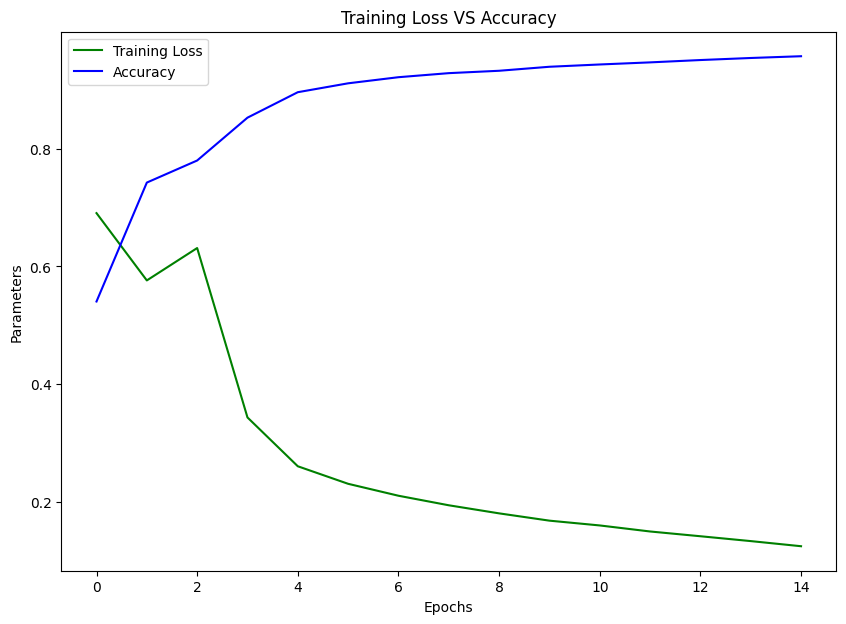

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(model_hist.history['loss'], label = 'Training Loss', color = 'green')
plt.plot(model_hist.history['accuracy'], label = 'Accuracy', color = 'blue')
plt.title("Training Loss VS Accuracy")
plt.xlabel("Epochs")
plt.ylabel('Parameters')
plt.legend()
plt.show()

In [19]:
%%time
scores = model.evaluate(x=X_test,y=y_test)
print("Accuracy en test",round(scores[1]*100,2),"%")

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8809 - loss: 0.3010
Accuracy en test 88.07 %
CPU times: user 2.98 s, sys: 331 ms, total: 3.31 s
Wall time: 5.44 s


In [22]:
# Ejemplo LSTM + CNN
model = Sequential()

model.add(Embedding(input_dim = 5000, output_dim = 100, input_length=MAX_LEN))

model.add(Conv1D(filters=32,kernel_size=3,activation="relu"))
model.add(MaxPool1D(pool_size=2))

model.add(Conv1D(filters=64,kernel_size=3,activation="relu"))
model.add(MaxPool1D(pool_size=2))

model.add(Dropout(rate=0.2))

model.add(LSTM(units = 100,return_sequences=True))
model.add(Dropout(rate=0.5))
model.add(LSTM(units = 100,return_sequences=True))
model.add(Dropout(rate=0.5))

model.add(Flatten())

model.add(Dense(units=512, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(units=256, activation="relu"))
model.add(Dropout(rate=0.4))
model.add(Dense(units=128, activation="relu"))
model.add(Dropout(rate=0.3))

model.add(Dense(units=1, activation="sigmoid"))


# Definimos función de pérdida y optimizador
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [23]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_8 (MaxPooling1D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
%%time
model_hist = model.fit(x=X_train,y=y_train,batch_size=1024,epochs=15)

Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 292ms/step - accuracy: 0.4970 - loss: 0.6941
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 283ms/step - accuracy: 0.5736 - loss: 0.7361
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 281ms/step - accuracy: 0.5595 - loss: 0.6790
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 278ms/step - accuracy: 0.7578 - loss: 0.5137
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 272ms/step - accuracy: 0.8738 - loss: 0.3169
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 272ms/step - accuracy: 0.9020 - loss: 0.2581
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 273ms/step - accuracy: 0.9267 - loss: 0.2074
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 275ms/step - accuracy: 0.9433 - loss: 0.1668
Epoch 9/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 276ms/step - accuracy: 0.9497 - loss: 0.1468
Epoch 10/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 278ms/step - accuracy: 0.9487 - loss: 0.1458
Epoch 11/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 275ms/step - accuracy: 0.9702 - loss: 0.0983
Epoch 12/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 

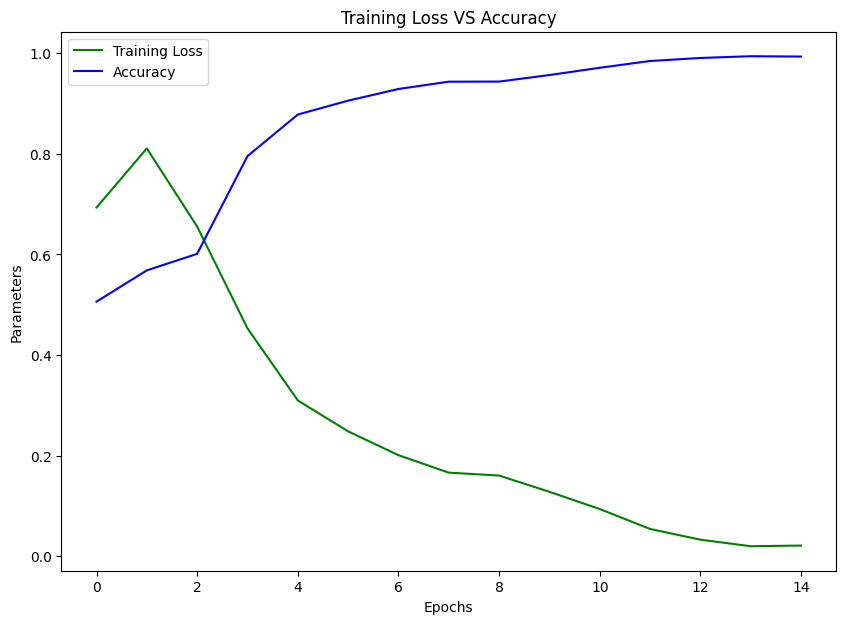

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(model_hist.history['loss'], label = 'Training Loss', color = 'green')
plt.plot(model_hist.history['accuracy'], label = 'Accuracy', color = 'blue')
plt.title("Training Loss VS Accuracy")
plt.xlabel("Epochs")
plt.ylabel('Parameters')
plt.legend()
plt.show()

In [28]:
%%time
scores = model.evaluate(x=X_test,y=y_test)
print("Accuracy en test",round(scores[1]*100,2),"%")

782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8678 - loss: 0.6657
Accuracy en test 86.88 %
CPU times: user 9.38 s, sys: 469 ms, total: 9.85 s
Wall time: 9.37 s
